# Oracle Dataset Exploration

This notebook explores the Oracle dataset stored in an Excel file located at:
```
/Users/tayebekavousi/Desktop/github_sa/datasets/not used/oracle.xlsx
```

We will:
1. Display the first 10 rows of the dataset.
2. Sample 3 rows per class (based on the `sentiment` label).
3. Visualize the distribution of classes.
4. Analyze text lengths (word count) and display summary statistics with a histogram.
5. Generate a word cloud for each class.
6. Prepare a PyTorch `Dataset` and `DataLoader` for fine-tuning.


## 1. Importing Required Libraries

We import the necessary libraries: `pandas`, `numpy`, `matplotlib`, `wordcloud`, and `torch`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import torch
from torch.utils.data import Dataset, DataLoader

# Enable inline plotting
%matplotlib inline

## 2. Loading the Oracle Dataset from Excel

Here we load the dataset. Since the file does not include header rows, we specify `header=None` and assign custom column names: `message` and `sentiment`.

In [2]:
file_path = "/Users/tayebekavousi/Desktop/github_sa/datasets/not used/oracle.xlsx"

try:
    # Read the Excel file without headers and assign column names
    df = pd.read_excel(file_path, header=None, names=["message", "sentiment"])
    print("Oracle dataset loaded successfully!")
except Exception as e:
    print("Error loading dataset:", e)

print("Dataset shape:", df.shape)

Oracle dataset loaded successfully!
Dataset shape: (1601, 2)


## 3. Display the First 10 Rows

We print the first 10 rows to get an initial overview of the dataset.

In [3]:
print("Head of the Oracle dataset (10 rows):")
display(df.head(10))

Head of the Oracle dataset (10 rows):


,message,sentiment
0,message,sentiment
1,This should read:\n\nThis survey tests the loc...,0
2,- Should be like below:\ntextDirection = SWT.A...,0
3,"""""""create a vdsm.config.config clone, modified...",0
4,"""Add test(s) performing the static code analys...",0
5,"""apt-get"" is distro specific... perhaps make i...",0
6,"""easy"" is marketing; let the code speak for it...",0
7,"""system-provided version"" or ""version provided...",0
8,"""that all 4 projects are imported"" or ""that it...",0
9,"""throws"" should be indented an additional 4 sp...",0


## 4. Sampling 3 Rows from Each Class

We sample 3 rows per class (based on the `sentiment` label) to inspect representative entries.

In [4]:
if 'sentiment' in df.columns:
    try:
        sample_df = df.groupby('sentiment').apply(lambda x: x.sample(n=10, random_state=42)).reset_index(drop=True)
        print("Sample (10 rows per class):")
        display(sample_df)
    except ValueError as e:
        print("Sampling error:", e)
else:
    print("Column 'sentiment' not found in the dataset.")

Sampling error: Cannot take a larger sample than population when 'replace=False'


## 5. Distribution Analysis of Classes

We visualize the distribution of the `sentiment` labels using a bar chart.

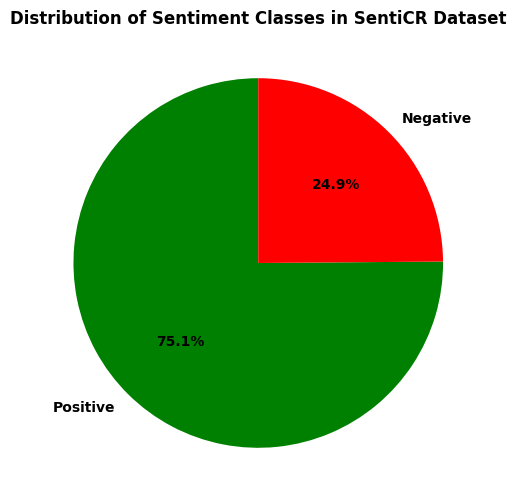

In [11]:
if 'sentiment' in df.columns:
    # Exclude any row where the 'sentiment' value is equal to the header name
    df_filtered = df[df['sentiment'] != 'sentiment']
    class_counts = df_filtered['sentiment'].value_counts()
    
    # Map sentiment values to custom labels and colors
    labels = []
    colors = []
    for sentiment in class_counts.index:
        if str(sentiment) == '-1':
            labels.append('Negative')
            colors.append('red')
        elif str(sentiment) == '0':
            labels.append('Positive')
            colors.append('green')
        else:
            labels.append(str(sentiment))
            colors.append('blue')  # Fallback color if other values exist

    plt.figure(figsize=(6, 6))
    # Use plt.pie with textprops to set all text to bold
    wedges, texts, autotexts = plt.pie(
        class_counts.values,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'weight': 'bold'}
    )
    plt.title("Distribution of Sentiment Classes in SentiCR Dataset", fontweight='bold')
    plt.show()
else:
    print("Column 'sentiment' not found in the dataset.")


## 6. Text Length (Word) Analysis

We compute the word count for each message, print summary statistics (average, median, maximum, minimum), and display a histogram of word counts.

Text Length Analysis (in words):
Average Length: 28.96
Median Length: 20.0
Maximum Length: 250
Minimum Length: 1


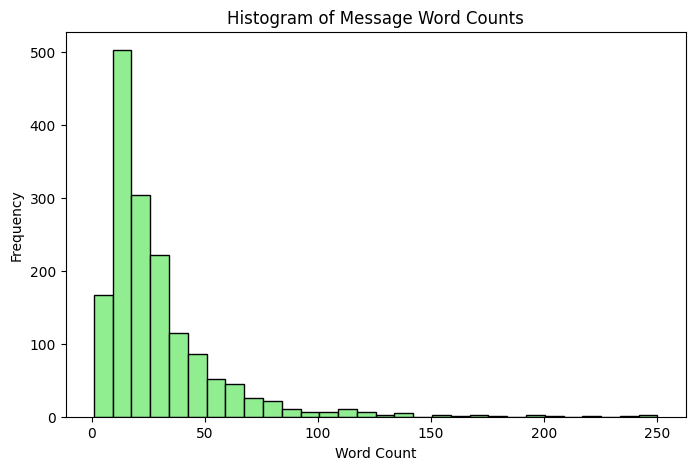

In [6]:
if 'message' in df.columns:
    df['word_count'] = df['message'].astype(str).apply(lambda x: len(x.split()))
    
    avg_length = df['word_count'].mean()
    median_length = df['word_count'].median()
    max_length = df['word_count'].max()
    min_length = df['word_count'].min()
    
    print("Text Length Analysis (in words):")
    print(f"Average Length: {avg_length:.2f}")
    print(f"Median Length: {median_length}")
    print(f"Maximum Length: {max_length}")
    print(f"Minimum Length: {min_length}")
    
    plt.figure(figsize=(8, 5))
    plt.hist(df['word_count'], bins=30, color='lightgreen', edgecolor='black')
    plt.title("Histogram of Message Word Counts")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'message' not found in the dataset.")

## 7. Word Cloud for Each Class

We generate a word cloud for each `sentiment` class to visualize the word distribution separately.

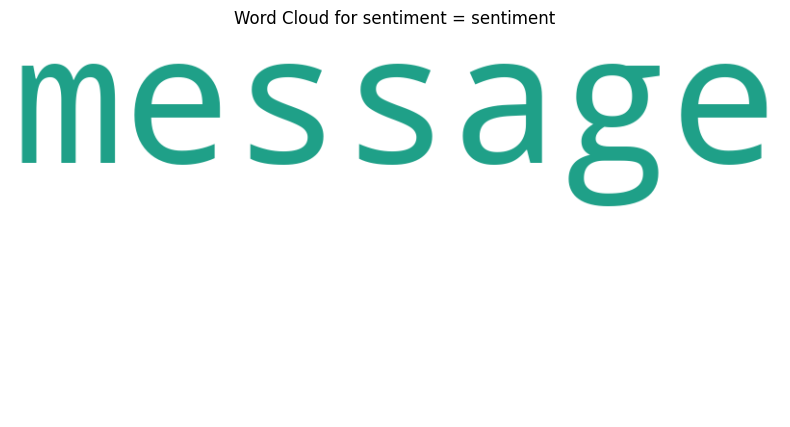

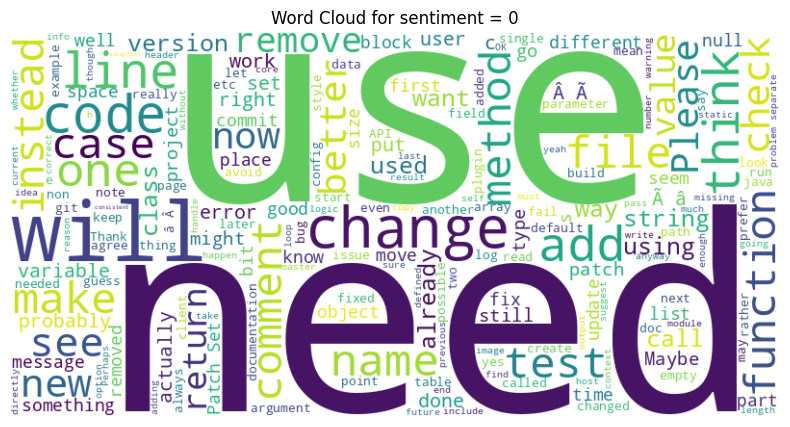

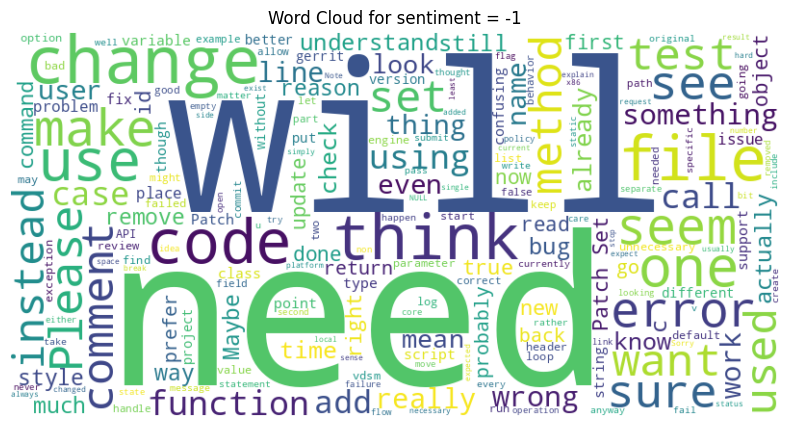

In [7]:
if 'message' in df.columns and 'sentiment' in df.columns:
    for class_value in df['sentiment'].unique():
        subset_df = df[df['sentiment'] == class_value]
        text_combined = " ".join(subset_df['message'].dropna().astype(str).tolist())
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for sentiment = {class_value}")
        plt.axis("off")
        plt.show()
else:
    print("Either 'message' or 'sentiment' column not found in the dataset.")